# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    elem_null=arr==0
    null_sum=elem_null.sum()
    if null_sum==0:
        return None
    else:
        k_elem=arr[1:][elem_null[:-1]].max()
        return k_elem
    
# http://www.cyberforum.ru/python/thread1659360.html

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
y=np.array([1, 2, 4, 3, 5, 7, 6, 8, 9])
print(max_element(x),max_element(y))

5 None


**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [861]:
def nearest_value(X, v):
    idx = np.abs(X-v*np.ones_like(X)).min()
    return int(X[np.where(abs(X-v)==idx)])

In [862]:
X = np.arange(0,10).reshape(2,5)
idx = np.abs(X-3.6*np.ones_like(X)).argmin()
idx

4

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [1187]:
def scale(X):
    m=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    if np.sum(np.where(std==0))==0:
        X=(X-m)/std
        return X        
    else:
        return print('zero division') 
    
#https://pastebin.com/j1BWD39H

In [1167]:
X=np.random.randint(10, size=(5, 7))
scale(X)

array([[ 1.59200589,  0.70920814, -1.73719807,  1.21987509, -0.51832106,
        -0.72547625, -1.11803399],
       [ 0.45485883,  0.70920814,  0.26726124, -0.97590007,  0.34554737,
        -0.72547625, -0.55901699],
       [-0.30323922,  0.98198051,  0.93541435, -0.73192505, -1.38218948,
        -0.72547625,  0.55901699],
       [-0.30323922, -0.92742603,  0.93541435, -0.73192505, -0.08638684,
         1.81369063, -0.55901699],
       [-1.44038628, -1.47297076, -0.40089186,  1.21987509,  1.64135001,
         0.36273813,  1.67705098]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [1170]:
def get_stats(X):
    return np.linalg.det(X),np.trace(X),np.amax(X), \
        np.amin(X), np.linalg.norm(X,'fro'), np.linalg.eigvals(X),np.linalg.inv(X) 

mu, sigma = (10,1)
x=np.random.normal(mu, sigma, 4)
y=x.reshape(2,2)
get_stats(y)

(18.594705209681901,
 20.972422563428651,
 11.169630760884077,
 8.4714955572977519,
 20.192914269309448,
 array([  0.92765899,  20.04476357]),
 array([[ 0.60068878, -0.57704416],
        [-0.45558644,  0.52718189]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [1172]:
l=[]
for exp_num in range(100):
    mu, sigma = (0,1)
    xx=np.random.normal(mu, sigma, 100)
    yy=np.random.normal(mu, sigma, 100)
    xxx=xx.reshape(10,10)
    yyy=yy.reshape(10,10)
    mult=np.dot(xxx,yyy)
    l.append(np.amax(mult))

print('mean',np.mean(l),'квантиль',np.percentile(l, 95))
# Your code here

mean 8.51625758919 квантиль 11.9952038838


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [1173]:
import pandas as pd
df=pd.read_csv("2008.csv",skipinitialspace=True,)

In [323]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [180]:
#столько всего NaN
df.isnull().sum().sum()

355215

In [1175]:
print(df.shape[0]-df.dropna(0,how='any').shape[0],'Столько объектов имеют хотя бы один пропуск')

70000 Столько объектов имеют хотя бы один пропуск


In [1111]:
sum(df.columns.value_counts()) # признаков всего

29

In [1176]:
print((df.isnull().sum()>=1).sum() ,'есть хотя бы 1 пропуск')

16 есть хотя бы 1 пропуск


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [964]:
nan_objects=df['DepDelay'].index[df['DepDelay'].isnull()]
null_objects=df['DepDelay'].index[df['DepDelay']==0]
DF=df.iloc[nan_objects]
DF.head()

# Здесь можно увидеть такую картину , что для этих наблюдений значение DepTime и ArrTime отсутствует, забавно 
#Сancelled =1 всюду  a Diverted всюду равен 0

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [1177]:
df_nan_out=df['DepDelay'].dropna(axis=0,how='any')
df_target=df_nan_out[df_nan_out!=0]
idx_list=np.array(df_target.index)

New_df=df.iloc[idx_list]
df_work=New_df.dropna(1,how='any')


Y=df_work['DepDelay']
New_df=New_df.drop(['Cancelled','Diverted','CancellationCode','DepDelay'],axis=1) 
# Cancelled - так как мы рассматриваем рейсы которые не были отменены, поэтому пропадает необходимость рассмотрения C
# CancellationCode а такж Diverted 
New_df.shape

(63404, 25)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [966]:
def time(name):
    New_df[name+'_minute']=[time % 100 for time in New_df[name]] 
    New_df[name+'_hour']=[time // 100 for time in New_df[name]]

In [967]:
L=['DepTime','ArrTime','CRSDepTime','CRSArrTime']
for i in L:
    time(i)

In [968]:
New_df=New_df.drop(L,axis=1)

In [969]:
DF=New_df

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [970]:
DF=DF.drop(['TailNum','Year','Origin'],axis=1)

Убираем признак Origin по нескольким причинам, во-первых данный признак имеет почти 300 уникальных значений, и так как мы будем обучать нашу модель на 1000 объектах мы получим весьма разреженные матрицу, у некоторых признаков будут практически нулевые коэффициенты. Здесь стоит оговорить как стоило бы поступить, необходимо было бы посмотреть на распределение значений данного признака по обэектам и выделить кластеры одного значения признака с наибольшим вхождением объектов и уже для них задать отношение порядка

In [971]:
for i in DF.columns:
    if DF[i].dtype !='object':
        print(i,Y.corr(DF[i],method='pearson'))

Month -0.0295284355135
DayofMonth 0.00857381395908
DayOfWeek 0.0085300821683
FlightNum 0.0211664495964
ActualElapsedTime 0.0419460588407
CRSElapsedTime 0.0343018722712
AirTime 0.0252373033045
ArrDelay 0.933525938482
Distance 0.0242523920732
TaxiIn 0.020640432286
TaxiOut 0.101294189022
CarrierDelay 0.532696179045
WeatherDelay 0.238872240063
NASDelay 0.171590575897
SecurityDelay 0.0106679312951
LateAircraftDelay 0.553805903594
DepTime_minute -0.0170548066739
DepTime_hour 0.203124568913
ArrTime_minute 0.00617138358464
ArrTime_hour 0.0701811108113
CRSDepTime_minute 0.0224373274671
CRSDepTime_hour 0.140084486975
CRSArrTime_minute 0.00860927622987
CRSArrTime_hour 0.135560872548


Как можно заметить ArrDelay сильно скореллирован с нашей целевой переменной, поэтому мы буем его дропатьпо
Поскольку логично предположить, что для вновь пришедшего в выборку объекта мы не знаем его парметры по таким признакам, как DepTime_Minute, DepTime_Hour а также ArrTime_minute, ArrTime_Hour, нам лишь изестно время отправления и прибытия самолёта по расписанию.

In [972]:
Matrix=DF.drop(['ArrDelay','DepTime_minute','DepTime_hour','ArrTime_minute','ArrTime_hour'],axis=1)
Matrix.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'CRSDepTime_minute',
       'CRSDepTime_hour', 'CRSArrTime_minute', 'CRSArrTime_hour'],
      dtype='object')

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

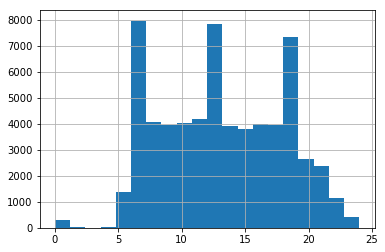

In [869]:
%matplotlib inline
DF['DepTime_hour'].hist(bins=20)

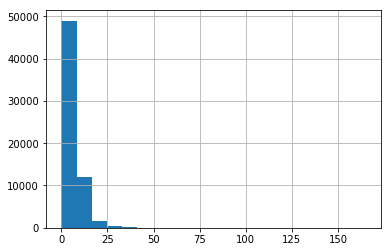

In [1156]:
DF['TaxiIn'].hist(bins=20)

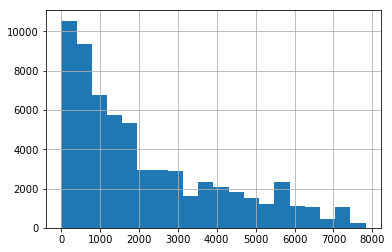

In [1157]:
DF['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

На этих графиках наблюдается проблема масштаба, при построении регрессии по данным признакам объекты с большими значениями будут вносить больший вклад, в то время как объекты с меньшими значениями признаков будут восприниматься как шумовые объекты, поэтому нужно масштабировать признаки, так как линейные модели весьма чувствительны к масштабируемости

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [973]:
from sklearn.feature_extraction import DictVectorizer 
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    Scaler = StandardScaler()
    binary=[]
    R=[]
    for j in Matrix.columns:
        if Matrix[j].dtype != 'object':
            R.append(j)
        else:
            binary.append(j)
    data[binary]=data[binary].fillna('nan')
    data[R]=data[R].fillna(0)
    data_dummies = pd.get_dummies(data[binary])
    data[R] = Scaler.fit_transform(data[R])
    data=data[R].join(data_dummies)
    return data
    # Your code here

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [974]:
Matrix=transform_data(Matrix)

In [975]:
Matrix.shape

(63404, 337)

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [1178]:
from sklearn.cross_validation import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(Matrix, Y, test_size = 0.3,random_state=42)

In [977]:
X_train.shape

(44382, 337)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [979]:
from sklearn.linear_model import LinearRegression as lm
import sklearn.metrics as metrics

X_low=X_train[:1000]
Y_low=Y_train[:1000]
linreg=lm()
model_1=linreg.fit(X_low,Y_low)

In [1132]:
print('MSE Train Subset',metrics.mean_squared_error(Y_low, model_1.predict(X_low)))
print('R2 Train Subset',metrics.r2_score(Y_low, model_1.predict(X_low)))
print('MSE Test',metrics.mean_squared_error(Y_test, model_1.predict(X_test)))
print('R2 Test',metrics.r2_score(Y_test, model_1.predict(X_test)))

MSE Train Subset 56.5093595983
R2 Train Subset 0.946680061614
MSE Test 1.04771617783e+23
R2 Test -7.83240253343e+19


In [1133]:
coefficients = pd.DataFrame({"col_names":X_train.columns,"Coefficients":np.transpose(linreg.coef_)})
coefficients.head()

,Coefficients,col_names
0,-0.464055,Month
1,-0.452051,DayofMonth
2,0.363589,DayOfWeek
3,-0.915303,FlightNum
4,121.195426,ActualElapsedTime


Модель настроилась на наши данные и переобучилась, о чём свидетельствует выокий показатель r2 на обучающей и отрицательный на тестовой

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [1129]:
from sklearn.linear_model import LassoCV, RidgeCV
alpha_grid = np.arange(0.01, 7, 0.01)

lasso = LassoCV(alphas = alpha_grid, cv= 5)
ridge = RidgeCV(alphas = alpha_grid, cv= 5)
model_lasso = lasso.fit(X_low,Y_low)
model_ridge = ridge.fit(X_low, Y_low)

In [1134]:
print(model_lasso.alpha_,'\n'
      'MSE_lasso Train', metrics.mean_squared_error(Y_low, model_lasso.predict(X_low)),'\n'
      'R2_lasso Train:', metrics.r2_score(Y_low, model_lasso.predict(X_low)), '\n'
      'MSE_lasso Test:', metrics.mean_squared_error(Y_test, model_lasso.predict(X_test)), '\n'
      'R2_lasso Test:', metrics.r2_score(Y_test, model_lasso.predict(X_test)))

0.03 
MSE_lasso Train 67.0791932673 
R2_lasso Train: 0.936706795522 
MSE_lasso Test: 79.2426992381 
R2_lasso Test: 0.940760605648


In [1136]:
print(model_ridge.alpha_,'\n'
      'MSE_ridge Train', metrics.mean_squared_error(Y_low, model_ridge.predict(X_low)),'\n'
      'R2_ridge Train:', metrics.r2_score(Y_low, model_ridge.predict(X_low)), '\n'
      'MSE_ridge Test:', metrics.mean_squared_error(Y_test, model_ridge.predict(X_test)), '\n'
      'R2_ridge Test:', metrics.r2_score(Y_test, model_ridge.predict(X_test)))

5.19 
MSE_ridge Train 64.8821229934 
R2_ridge Train: 0.938779861868 
MSE_ridge Test: 81.2873160594 
R2_ridge Test: 0.939232113266


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [1242]:
X_train['One']=1
X_test['One']=1
# Your code here

In [885]:
X_train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut',
       ...
       'Dest_TYS', 'Dest_VLD', 'Dest_VPS', 'Dest_WRG', 'Dest_WYS', 'Dest_XNA',
       'Dest_YAK', 'Dest_YKM', 'Dest_YUM', 'One'],
      dtype='object', length=338)

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [938]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    y_pred=np.dot(X,w)
    return y_pred
    pass

In [940]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    y_pred=make_pred(X,w)
    MSPE=np.dot(((y-y_pred)/y).T,(y-y_pred)/y)/len(y)
    return MSPE
    pass

In [941]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    y_pred=make_pred(X,w)
    gradient = 2*np.dot((-X.T/y), ((y-y_pred)/y))/len(y)
    return gradient
    pass

In [942]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    y_pred = make_pred(X, w)
    MSPE = (np.dot(((y-y_pred)/y).T, (y-y_pred)/y))/len(y)+np.dot(w.T, w)
    return MSPE
    pass

In [1288]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    y_pred = make_pred(X, w)
    gradient=2*(np.dot((-X.T/y), ((y-y_pred)/y))/len(y)) + 2*w
    return gradient
    pass

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [1301]:
from numpy import linalg as LA
from scipy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    if is_reg !=True:
        points=[]
        MSPE=[]
        iterations=[]
        plt.figure(figsize=(3, 3))
        for i in range (1,max_iter):
            iterations.append(i)
            step_size=step_size/np.sqrt(i)
            f=get_func(w0, X, y)
            MSPE.append(f)
            points.append(w0)
            w = w0 - step_size *get_grad(w0, X, y)
            #print(MSPE[-1])
            if norm(w - w0) < eps:
                break 
            w0=w
        plt.plot(iterations,MSPE)
        xlabel('Iteration')
        ylabel('MSPE')
    
    else:
        points = []
        MSPE=[]
        iterations=[]
        plt.figure(figsize=(3, 3))
        for i in range (1,max_iter):
            iterations.append(i)
            step_size=step_size/np.sqrt(i)
            g=get_reg_func(w0, X, y)
            MSPE.append(g)
            points.append(w0)
            w = w0 - step_size *get_reg_grad(w0, X, y)
            #print(MSPE[-1])
            if norm(w - w0) < eps:
                break
            w0=w
        plt.plot(iterations,MSPE)
        xlabel('Iteration')
        ylabel('MSPE')
    
    return points[-1],MSPE,iterations

# https://github.com/FilatovArtm/ML_Eco-NES_2017/blob/master/seminars/sem2/sem02.ipynb

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [1012]:
step_list=np.array([0.001,1,10])
init_w=list([np.zeros(len(X_train.columns)), np.random.random(len(X_train.columns))])

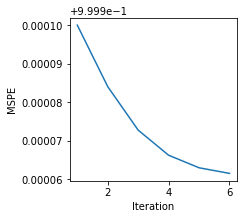

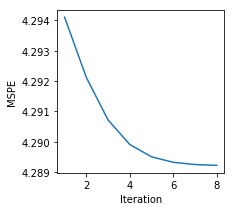

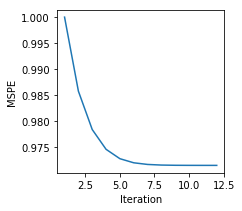

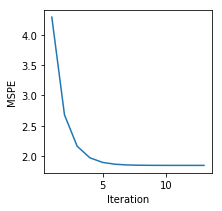

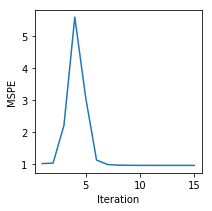

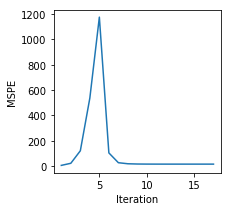

In [1298]:
for step in step_list:
    for init in range(len(init_w)):
        grad_descent(X_train[:1000],Y_train[:1000],init_w[init],step, 20000,1e-05,False)

Лучше всего себя показывает нулевая инициализация весов, градиентный спуск сходится быстрее+ значения наименьшие при нулевой инициализации, это всё следствие того, что у нас всё ещё разреженная матрица с признаком Dest, поэтому в ней в идеале для нашей модели должны быть много нулевых элементов

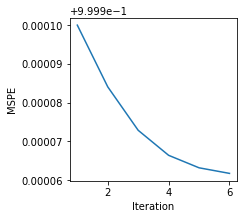

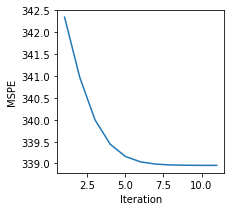

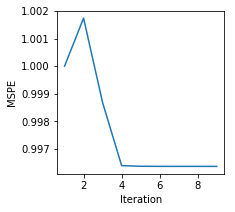

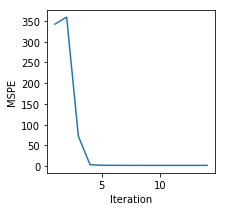

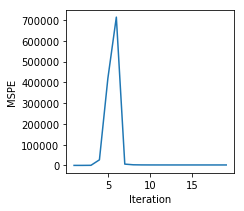

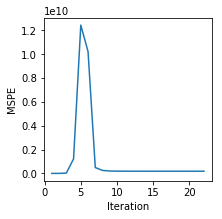

In [1299]:
for step in step_list:
    for init in range(len(init_w)):
        grad_descent(X_train[:1000],Y_train[:1000],init_w[init],step, 20000,1e-05,True)

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

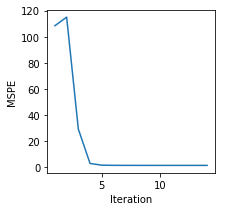

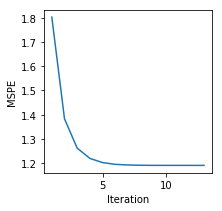

In [1351]:
w,mspe,itera=grad_descent(X_train,Y_train,np.random.random(len(X_train.columns)),1, 20000,1e-05,True)
w_1,mspe_1,itera_1=grad_descent(X_train,Y_train,np.random.random(len(X_train.columns)),1, 20000,1e-05,False)

Регуляризованный функционал быстрее ищет минимум, так как он шрафует за наличие больших весов

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [1340]:
def get_idx(X):
    index_num = np.random.randint(X.shape[0])
    return index_num
    pass

def sgd(X, y,w0, step_size, max_iter, eps, is_reg):
    if is_reg !=True:
        points=[]
        MSPE=[]
        iterations=[]
        plt.figure(figsize=(4, 4))
        for i in range (1,max_iter):
            idx=get_idx(X)
            iterations.append(i)
            step_size=step_size/np.sqrt(i)
            f=get_func(w0, X, y)
            MSPE.append(f)
            points.append(w0)
            y_pred=make_pred(X,w0)
            sgrad =2*np.dot((-X.loc[X.index[idx]].T/y[X.index[idx]]), ((y[X.index[idx]] - y_pred[idx])/(y[X.index[idx]])))/len(y)
            w = w0 - step_size *sgrad
            #print(norm(w-w0),MSPE[-1])
            if norm(w - w0) < eps:
                break 
            w0=w
        plt.plot(iterations,MSPE)
    else:
        points = []
        MSPE=[]
        iterations=[]
        for i in range (1,max_iter):
            idx=get_idx(X)
            iterations.append(i)
            step_size=step_size/np.sqrt(i)
            g=get_reg_func(w0, X, y)
            MSPE.append(g)
            points.append(w0)
            y_pred=make_pred(X,w0)
            sgrad = 2*np.dot((-X.loc[X.index[idx]].T/y[X.index[idx]]), ((y[X.index[idx]] - y_pred[idx])/y[X.index[idx]]))/len(y) + 2*w0
            w = w0 - step_size *sgrad
            #print(norm(w-w0),MSPE[-1])
            if norm(w - w0) < eps:
                break
            w0=w
        plt.plot(iterations,MSPE)
    
    return points[-1],MSPE,iterations
    # Your code here

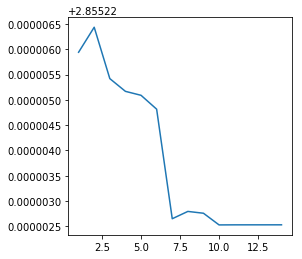

In [1321]:
weights,mspe_s,itera_s=sgd(X_train[:1000],Y_train[:1000],np.random.random(len(X_train.columns)),0.005, 20000,1e-10,False)

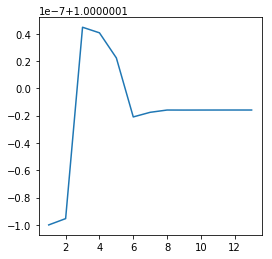

In [1386]:
weights,mspe_s,itera_s=sgd(X_train,Y_train,np.zeros(len(X_train.columns)),0.1, 20000,1e-10,False)

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [1387]:
y_prediction=make_pred(X_test,weights)
MSPE_s=get_func(weights,X_test,Y_test)
print('R2_Test', metrics.r2_score(Y_test,y_prediction))
print('MSE_Test', metrics.mean_squared_error(Y_test,y_prediction))
print('MSPE_Test', MSPE_s)

R2_Test -0.086833055574
MSE_Test 1453.8228469
MSPE_Test 1.00000002043


Необходима регуляризация

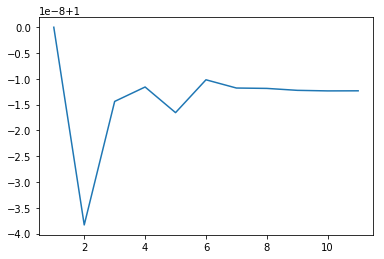

In [1378]:
weights_r,mspe_s,itera_s=sgd(X_train,Y_train,np.zeros(len(X_train.columns)),0.02, 20000,1e-10,True)

In [1379]:
y_prediction_r=make_pred(X_test,weights_r)
MSPE_s=get_func(weights_r,X_test,Y_test)
print('R2_Test', metrics.r2_score(Y_test,y_prediction_r))
print('MSE_Test', metrics.mean_squared_error(Y_test,y_prediction_r))
print('MSPE_Test', MSPE_s)

R2_Test -0.0868330007982
MSE_Test 1453.82277363
MSPE_Test 0.999999986564


Грустный результат регуляризация не улучшает резульат

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

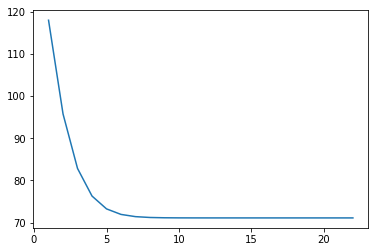

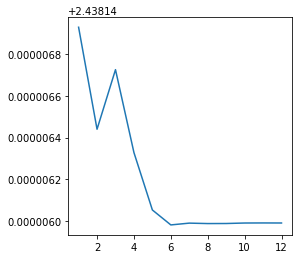

In [1368]:
weights_r,mspe_s,itera_s=sgd(X_train,Y_train,np.random.random(len(X_train.columns)),0.05, 20000,1e-10,True)
weights,mspe_s,itera_s=sgd(X_train,Y_train,np.random.random(len(X_train.columns)),0.05, 20000,1e-10,False)

Аналогичную картину можно наблюдать и здесь MSPE для регуляризованного варианта падает намного быстрее чем не для регуляризованного

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [1243]:
X_train=X_train.drop(['One'],axis=1)
X_test=X_test.drop(['One'],axis=1)

In [1244]:
linearreg = linreg.fit(X_train, Y_train)

In [1246]:
get_func(linearreg.coef_,X_test,Y_test)

2.0483424766935101e+23